In [3]:
from  langchain_openai import ChatOpenAI
import os 
from dotenv import load_dotenv

# This function will load all the variables from the .env file and will 
# make them available in the os.environ dictionary (env variables)
load_dotenv() 

if os.environ.get("OPENAI_API_KEY"):
    print("Bro API KEY Variable exists")
else:
    raise ValueError("OPENAI_API_KEY not found")

from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from  langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser

llm_openai = ChatOpenAI(model="gpt-5-mini",temperature=0)

Bro API KEY Variable exists


# **SQL DATABASE AGENT**


In [2]:
from langchain_community.utilities.sql_database import SQLDatabase

sql_db = SQLDatabase.from_uri("sqlite:///SalesDB/sales.db")

In [5]:
from langchain_community.agent_toolkits.sql.toolkit import SQLDatabaseToolkit

toolkit = SQLDatabaseToolkit(db=sql_db, llm=llm_openai)
toolkit.get_tools()

[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001E515F6D3A0>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001E515F6D3A0>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x000001E515F6D3A0>),
 QuerySQLCheckerTool(description='Use this tool to 

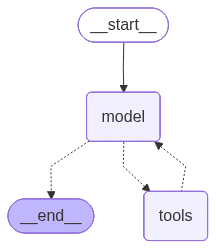

In [6]:
from langchain.agents import create_agent

agent = create_agent(llm_openai, toolkit.get_tools())
agent

In [8]:
example_query = "How much total sales we made for Tablet"

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

How much total sales we made for Tablet
================================== Ai Message ==================================
Tool Calls:
  sql_db_list_tables (call_QS6bH0rPg3gtHxgrGP9UGz5t)
 Call ID: call_QS6bH0rPg3gtHxgrGP9UGz5t
  Args:
    tool_input:
================================= Tool Message =================================
Name: sql_db_list_tables

orders
================================== Ai Message ==================================
Tool Calls:
  sql_db_schema (call_rJbZ2VTsknwqgpWYBw2vWRXl)
 Call ID: call_rJbZ2VTsknwqgpWYBw2vWRXl
  Args:
    table_names: orders
================================= Tool Message =================================
Name: sql_db_schema


CREATE TABLE orders (
	id INTEGER, 
	customer_name TEXT NOT NULL, 
	product_name TEXT NOT NULL, 
	quantity INTEGER NOT NULL, 
	price REAL NOT NULL, 
	total REAL NOT NULL, 
	PRIMARY KEY (id)
)

/*
3 rows from orders table:
id	customer_name